Import Library

# **Clustering Body Performance**
---

### **Kelompok 05 - Pembelajaran Mesin B**

1. Dzu Sunan Muhammad - 24060122120034
2. Dhela Realine - 24060122130078
3. Tera Makna Pratiwi - 24060122140102
5. Adzkiya Qarina Salsabila - 24060122140138

### **Introduction**

Pada unsupervised learning ini akan dilakukan clustering dengan menggunakan algoritma K-Means Clustering. Dataset yang digunakan adalah body performance dataset.

Detail dataset:
*   age: Usia individu dalam tahun.
*   gender: Jenis kelamin individu (Male/Female).
*   height_cm: Tinggi badan individu dalam sentimeter.
*   weight_kg: Berat badan individu dalam kilogram.
*   body fat_%: Persentase lemak tubuh individu.
*   diastolic: Tekanan darah diastolik (tekanan saat jantung beristirahat antara denyutan) dalam mmHg.
*   systolic: Tekanan darah sistolik (tekanan saat jantung memompa darah) dalam mmHg.
*   gripForce: Kekuatan genggaman tangan dalam satuan kilogram.
*   sit and bend forward_cm:  Jarak maksimum individu dapat membungkuk ke depan dari posisi duduk dalam sentimeter.
*   sit-ups counts: Jumlah sit-up yang bisa dilakukan individu dalam waktu tertentu.
*   broad jump_cm: Jarak maksimum lompatan jauh dalam sentimeter.
*   class: Kategori performa individu berdasarkan hasil pengujian fisik (A, B, C, D).


Tujuan dari clustering ini adalah untuk mengelompokkan individu berdasarkan karakteristik fisik dan performa mereka. Dengan pendekatan ini, diharapkan dapat diperoleh gambaran tentang pola-pola yang berbeda dalam performa fisik, sehingga dapat membantu memahami faktor-faktor yang memengaruhi kemampuan fisik individu. Analisis ini memberikan wawasan yang lebih mendalam untuk mengidentifikasi kelompok dengan karakteristik serupa dan mendukung pengambilan keputusan yang lebih tepat dalam merancang program peningkatan kebugaran atau intervensi kesehatan.

### **Import Library**

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
from scipy import stats
from scipy.stats import mstats
from scipy.spatial.distance import cdist
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
warnings.filterwarnings("ignore")

### **1. Memuat Dataset**

Memuat Dataset

In [288]:
data = pd.read_csv('bodyPerformance.csv')
data.shape

(13393, 12)

Struktur Dataset

In [289]:
data.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

Tipe Data

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


Missing Values

In [291]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

Duplicate Values

In [292]:
data.duplicated().sum()

1

### **2. Exploratory Data Analysis (EDA)**

Statistics Summary

In [293]:
data.describe().T

count        mean        std    min    25%    50%  \
age                      13393.0   36.775106  13.625639   21.0   25.0   32.0   
height_cm                13393.0  168.559807   8.426583  125.0  162.4  169.2   
weight_kg                13393.0   67.447316  11.949666   26.3   58.2   67.4   
body fat_%               13393.0   23.240165   7.256844    3.0   18.0   22.8   
diastolic                13393.0   78.796842  10.742033    0.0   71.0   79.0   
systolic                 13393.0  130.234817  14.713954    0.0  120.0  130.0   
gripForce                13393.0   36.963877  10.624864    0.0   27.5   37.9   
sit and bend forward_cm  13393.0   15.209268   8.456677  -25.0   10.9   16.2   
sit-ups counts           13393.0   39.771224  14.276698    0.0   30.0   41.0   
broad jump_cm            13393.0  190.129627  39.868000    0.0  162.0  193.0   

                           75%    max  
age                       48.0   64.0  
height_cm                174.8  193.8  
weight_kg                 75.3  138.1  
body fat_%                28.0   78.4  
diastolic                 86.0  156.2  
systolic                 141.0  201.0  
gripForce                 45.2   70.5  
sit and bend forward_cm   20.7  213.0  
sit-ups counts            50.0   80.0  
broad jump_cm            221.0  303.0

Histplot

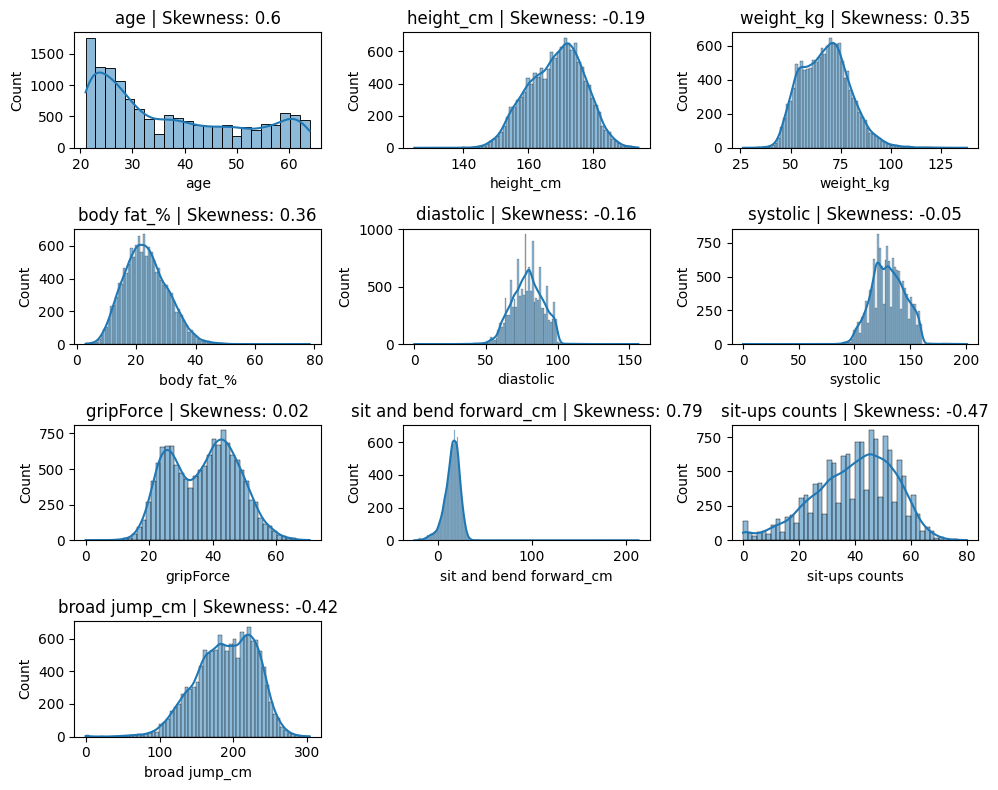

In [294]:
numeric_columns = data.select_dtypes(include=np.number).columns
num_cols = 3
num_rows = (len(numeric_columns) // num_cols) + (1 if len(numeric_columns) % num_cols != 0 else 0)
plt.figure(figsize=(10, num_rows * 2))

for idx, feature in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

Boxplot

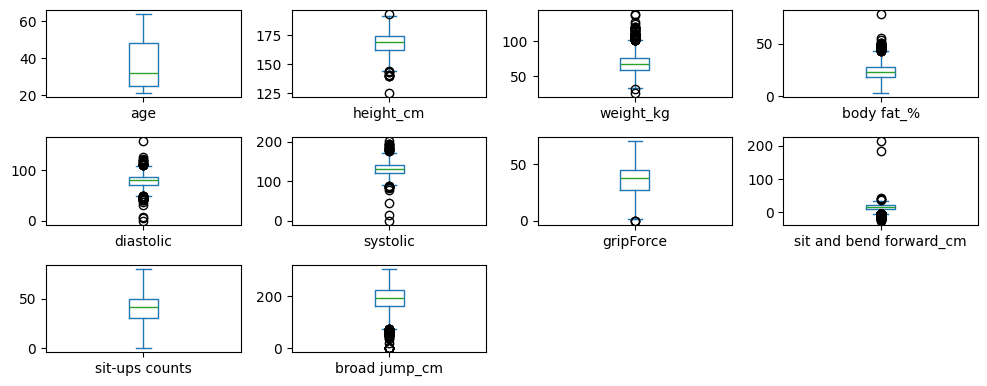

In [295]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(10, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Correlation Matrix

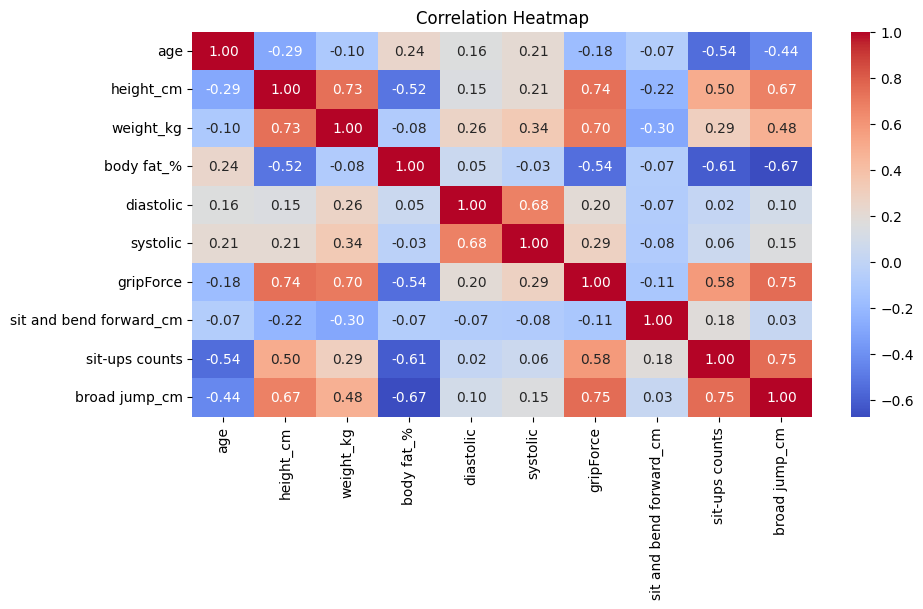

In [296]:
data_numeric = data.select_dtypes(include=['number'])
corr_matrix = data_numeric.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Korelasi Fitur Non-Numerik

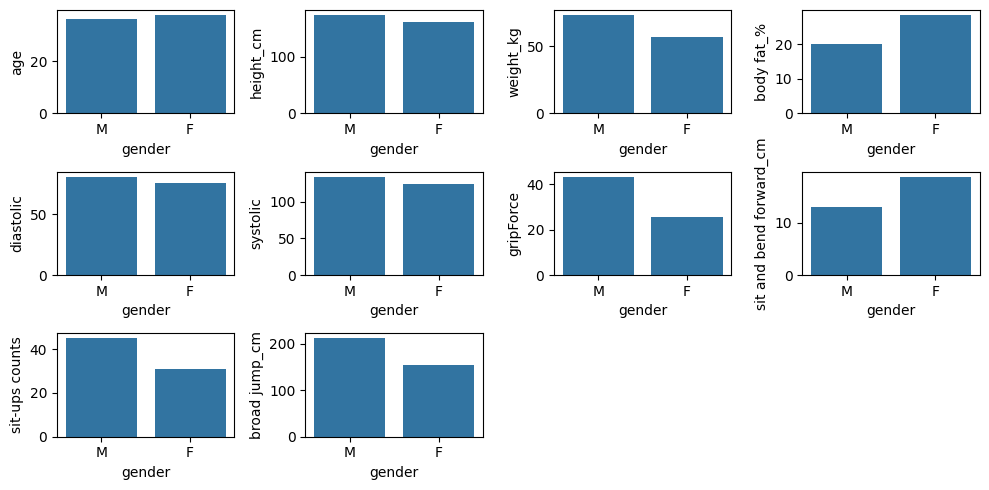

In [297]:
numeric_features = data.select_dtypes(include=['number']).columns
n_features = len(numeric_features)
n_cols = 4
n_rows = np.ceil(n_features / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.barplot(x='gender', y=feature, data=data, ci=None, ax=axes[i])
    axes[i].set_xlabel('gender')
    axes[i].set_ylabel(feature)

for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### **3. Hasil Eksplorasi Data**

1.Struktur Dataset:
- 13.393 baris
- 12 fitur

2.Tipe data fitur
- Numerik: age, height_cm, weight_kg, diastolic, systolic, gripForce, sit and bend forward_cm, sit-ups counts, broad jump_cm.
- Non-numerik: gender dan class.

3.Tidak terdapat missing values, namun terdapat duplicate values.

4.Distribusi data:
- age berdistribusi normal dengan rentang 21 - 64.
- hight_cm berdistribusi normal dengan rentang 125 - 193.
- weight_kg berdistirbusi normal dengan rentang 26 - 138.
- body fat_% berdistribusi normal dengan rentang 3 - 78.
- diastolic berdistribusi normal dengan rentang 0 - 156.
- systolic berdistribusi normal dengan rentang 0 - 201.
- gripForce berdisitribusi normal dengan rentang 0 - 70.
- sit and bend forward_cm berdistribusi normal dengan rentang -25 - 213.
- sit-ups counts berdistribusi normal dengan rentang 0 - 80.
- broad jump_cm berdistribusi normal dengan rentang 0 - 303.

5.Fitur dengan data outlier:
- height_cm
- weight_kg
- body fat_%
- diastolic
- systolic
- gripForce
- sit and bend forward_cm
- sit-ups counts
- broad jump_cm.

6.Korelasi fitur:

a. age:
- Memiliki banyak korelasi rendah dengan fitur lainnya.
- Namun berguna untuk mengetahui peran umur dalam performa tubuh yang dapat memberikan informasi untuk terkait performa tubuh.

b. height_cm:
- Memiliki banyak korelasi yang tinggi ataupun sedang dengan fitur lainnya.
- Berguna untuk mengukur tinggi tubuh yang relevan untuk performa tubuh.

c. weight_kg:
- Memiliki banyak korelasi yang tinggi ataupun sedang dengan fitur lainnya.
- Berguna untuk mengukur massa tubuh yang relevan untuk performa tubuh.

d. body fat_%:
- Memiliki banyak` korelasi sedang dan rendah dengan fitur lainnya.
- Berguna untuk mengetahui peran lemak tubuh dalam memengaruhi performa tubuh.

e. systolic:
- Memiliki korelasi tinggi dengan diastolic, namun berkorelasi rendah dengan fitur lainnya.
- Berguna untuk mencerminkan kapasitas kardiovaskular yang relevan untuk performa tubuh.

f. diastolic:
- Memiliki korelasi tinggi dengan systolic, namun berkorelasi rendah dengan fitur lainnya.
- Memberikan informasi yang mirip dengan systolic, dan tidak terlalu relevan untuk performa tubuh.

g. GripForce:
- Memiliki banyak korelasi tinggi dan sedang dengan fitur lainnya.
- Berguna untuk mengukur kekuatan otot tubuh bagian atas.

h. sit and bend forward_cm:
- Memiliki korelasi rendah dengan fitur lainnya.
- Namun berguna untuk mengukur fleksibilitas tubuh yang dapat memberikan informasi unik terkait performa tubuh.

i. sit-ups_counts:
- Memiliki banyak korelasi tinggi dengan fitur lainnya.
- Berguna untuk mengukur kekuatan inti dan daya tahan tubuh.

j. broad_jump_cm:
- Memiliki banyak korelasi tinggi dengan fitur lainnya.
- Berguna untuk mengukur kekuatan tubuh bagian bawah.

k. gender:
- Jenis gender individu mempengaruhi faktor-faktor performa fisik.
- Berguna untuk mengetahui perbedaan performa tubuh laki-laki dan perempuan.

### **4. Preprocessing**

Menghapus Duplikat Data

In [298]:
data = data.drop_duplicates().reset_index(drop=True)

Menghapus Fitur Tidak Relevan

In [299]:
cleaned_data = data.drop(columns=['class', 'diastolic']).dropna()

Mengubah Fitur Non-Numerik

In [300]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['gender']
encoders = {}

for column in categorical_columns:
    encoder = LabelEncoder()
    cleaned_data[column] = encoder.fit_transform(cleaned_data[column])
    encoders[column] = encoder

In [301]:
# encoded_value = 0

# original_value = encoders['gender'].inverse_transform([encoded_value])
# print(original_value)

Membersihkan Outlier

In [302]:
columns = ['height_cm', 'weight_kg', 'body fat_%', 'systolic',
           'gripForce', 'sit and bend forward_cm', 'broad jump_cm']

for column in columns:
    cleaned_data[column] = mstats.winsorize(cleaned_data[column], limits=[0.035, 0.007])

Normalisasi Data

In [303]:
columns = cleaned_data.columns
scaler = MinMaxScaler()
cleaned_data[columns] = scaler.fit_transform(cleaned_data[columns])

Cek Kembali Dataset

In [304]:
cleaned_data.shape

(13392, 10)

In [305]:
cleaned_data.head()

age  gender  height_cm  weight_kg  body fat_%  systolic  gripForce  \
0  0.139535     1.0   0.568452   0.522124    0.319489  0.472727   0.866005   
1  0.093023     1.0   0.351190   0.148134    0.140575  0.400000   0.406948   
2  0.232558     1.0   0.785714   0.575221    0.281150  0.872727   0.615385   
3  0.255814     1.0   0.633929   0.442478    0.226837  0.781818   0.531017   
4  0.162791     1.0   0.613095   0.377068    0.185304  0.418182   0.583127   

   sit and bend forward_cm  sit-ups counts  broad jump_cm  
0                 0.624260          0.7500       0.666667  
1                 0.562130          0.6625       0.745098  
2                 0.434911          0.6125       0.431373  
3                 0.529586          0.6625       0.679739  
4                 0.881657          0.5625       0.666667

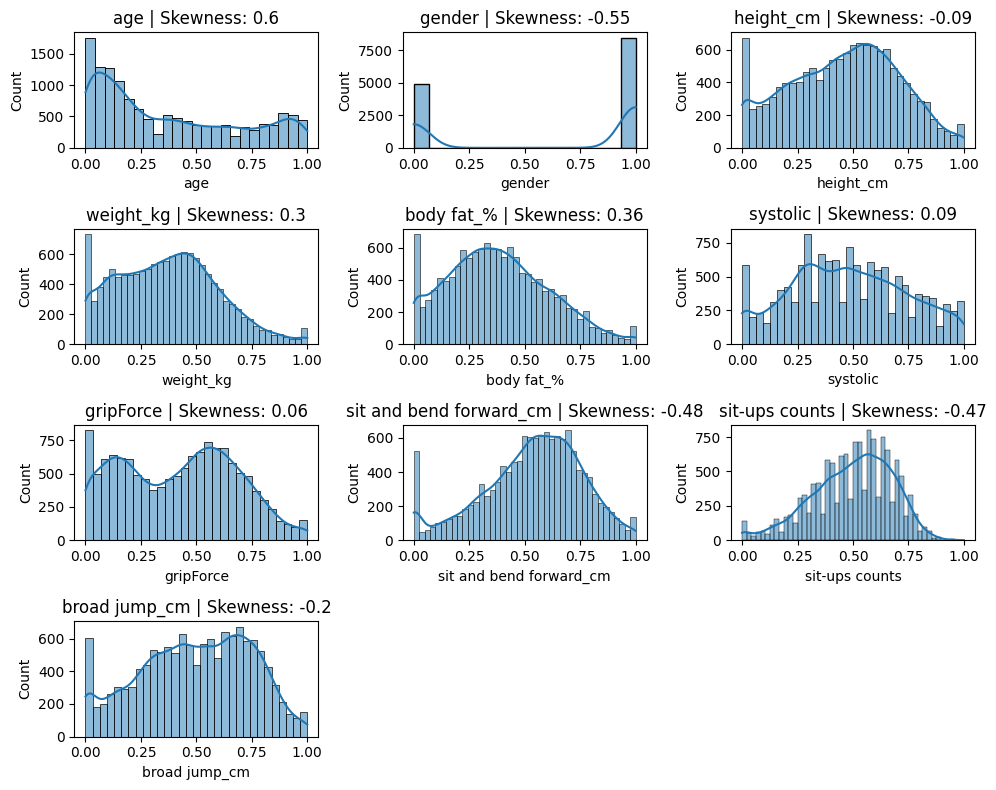

In [306]:
numeric_columns = cleaned_data.select_dtypes(include=np.number).columns
num_cols = 3
num_rows = (len(numeric_columns) // num_cols) + (1 if len(numeric_columns) % num_cols != 0 else 0)
plt.figure(figsize=(10, num_rows * 2))

for idx, feature in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, idx)
    sns.histplot(cleaned_data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(cleaned_data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

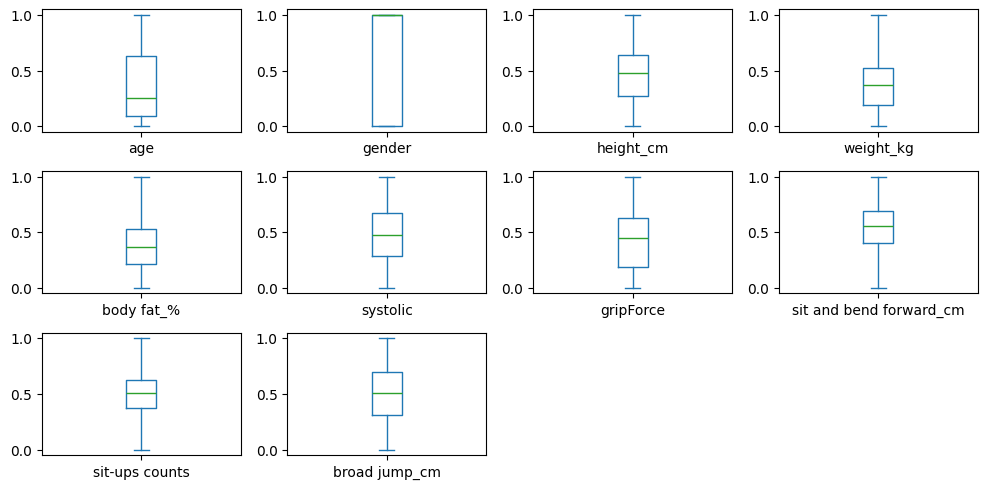

In [307]:
cleaned_data.plot(kind='box', subplots=True, layout=(3,4), figsize=(10, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

### **5. Clustering**

Uji Kecenderungan Cluster

In [308]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

hopkins_stat = hopkins(cleaned_data)
print(f"Hopkins Statistic: {hopkins_stat}")

Hopkins Statistic: 0.7728756825979598


Elbow Method

Text(0.5, 1.0, 'Elbow Method')

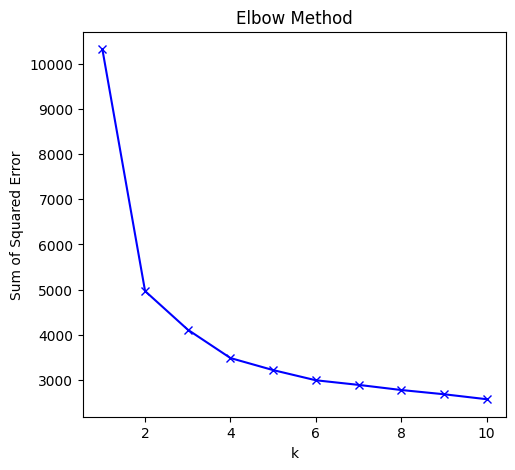

In [309]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cleaned_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method')

Silhouette Score

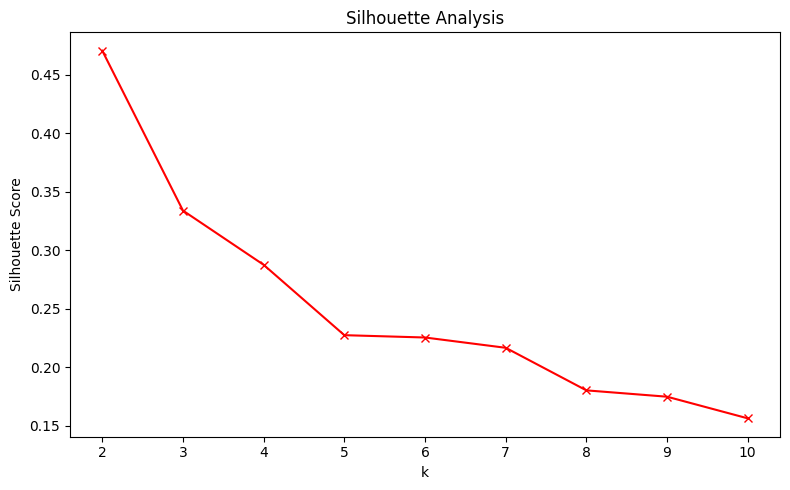

In [310]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cleaned_data)
    silhouette_scores.append(silhouette_score(cleaned_data, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

Training Model

In [311]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(cleaned_data)

cleaned_data['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

Visualisasi Cluster 2D

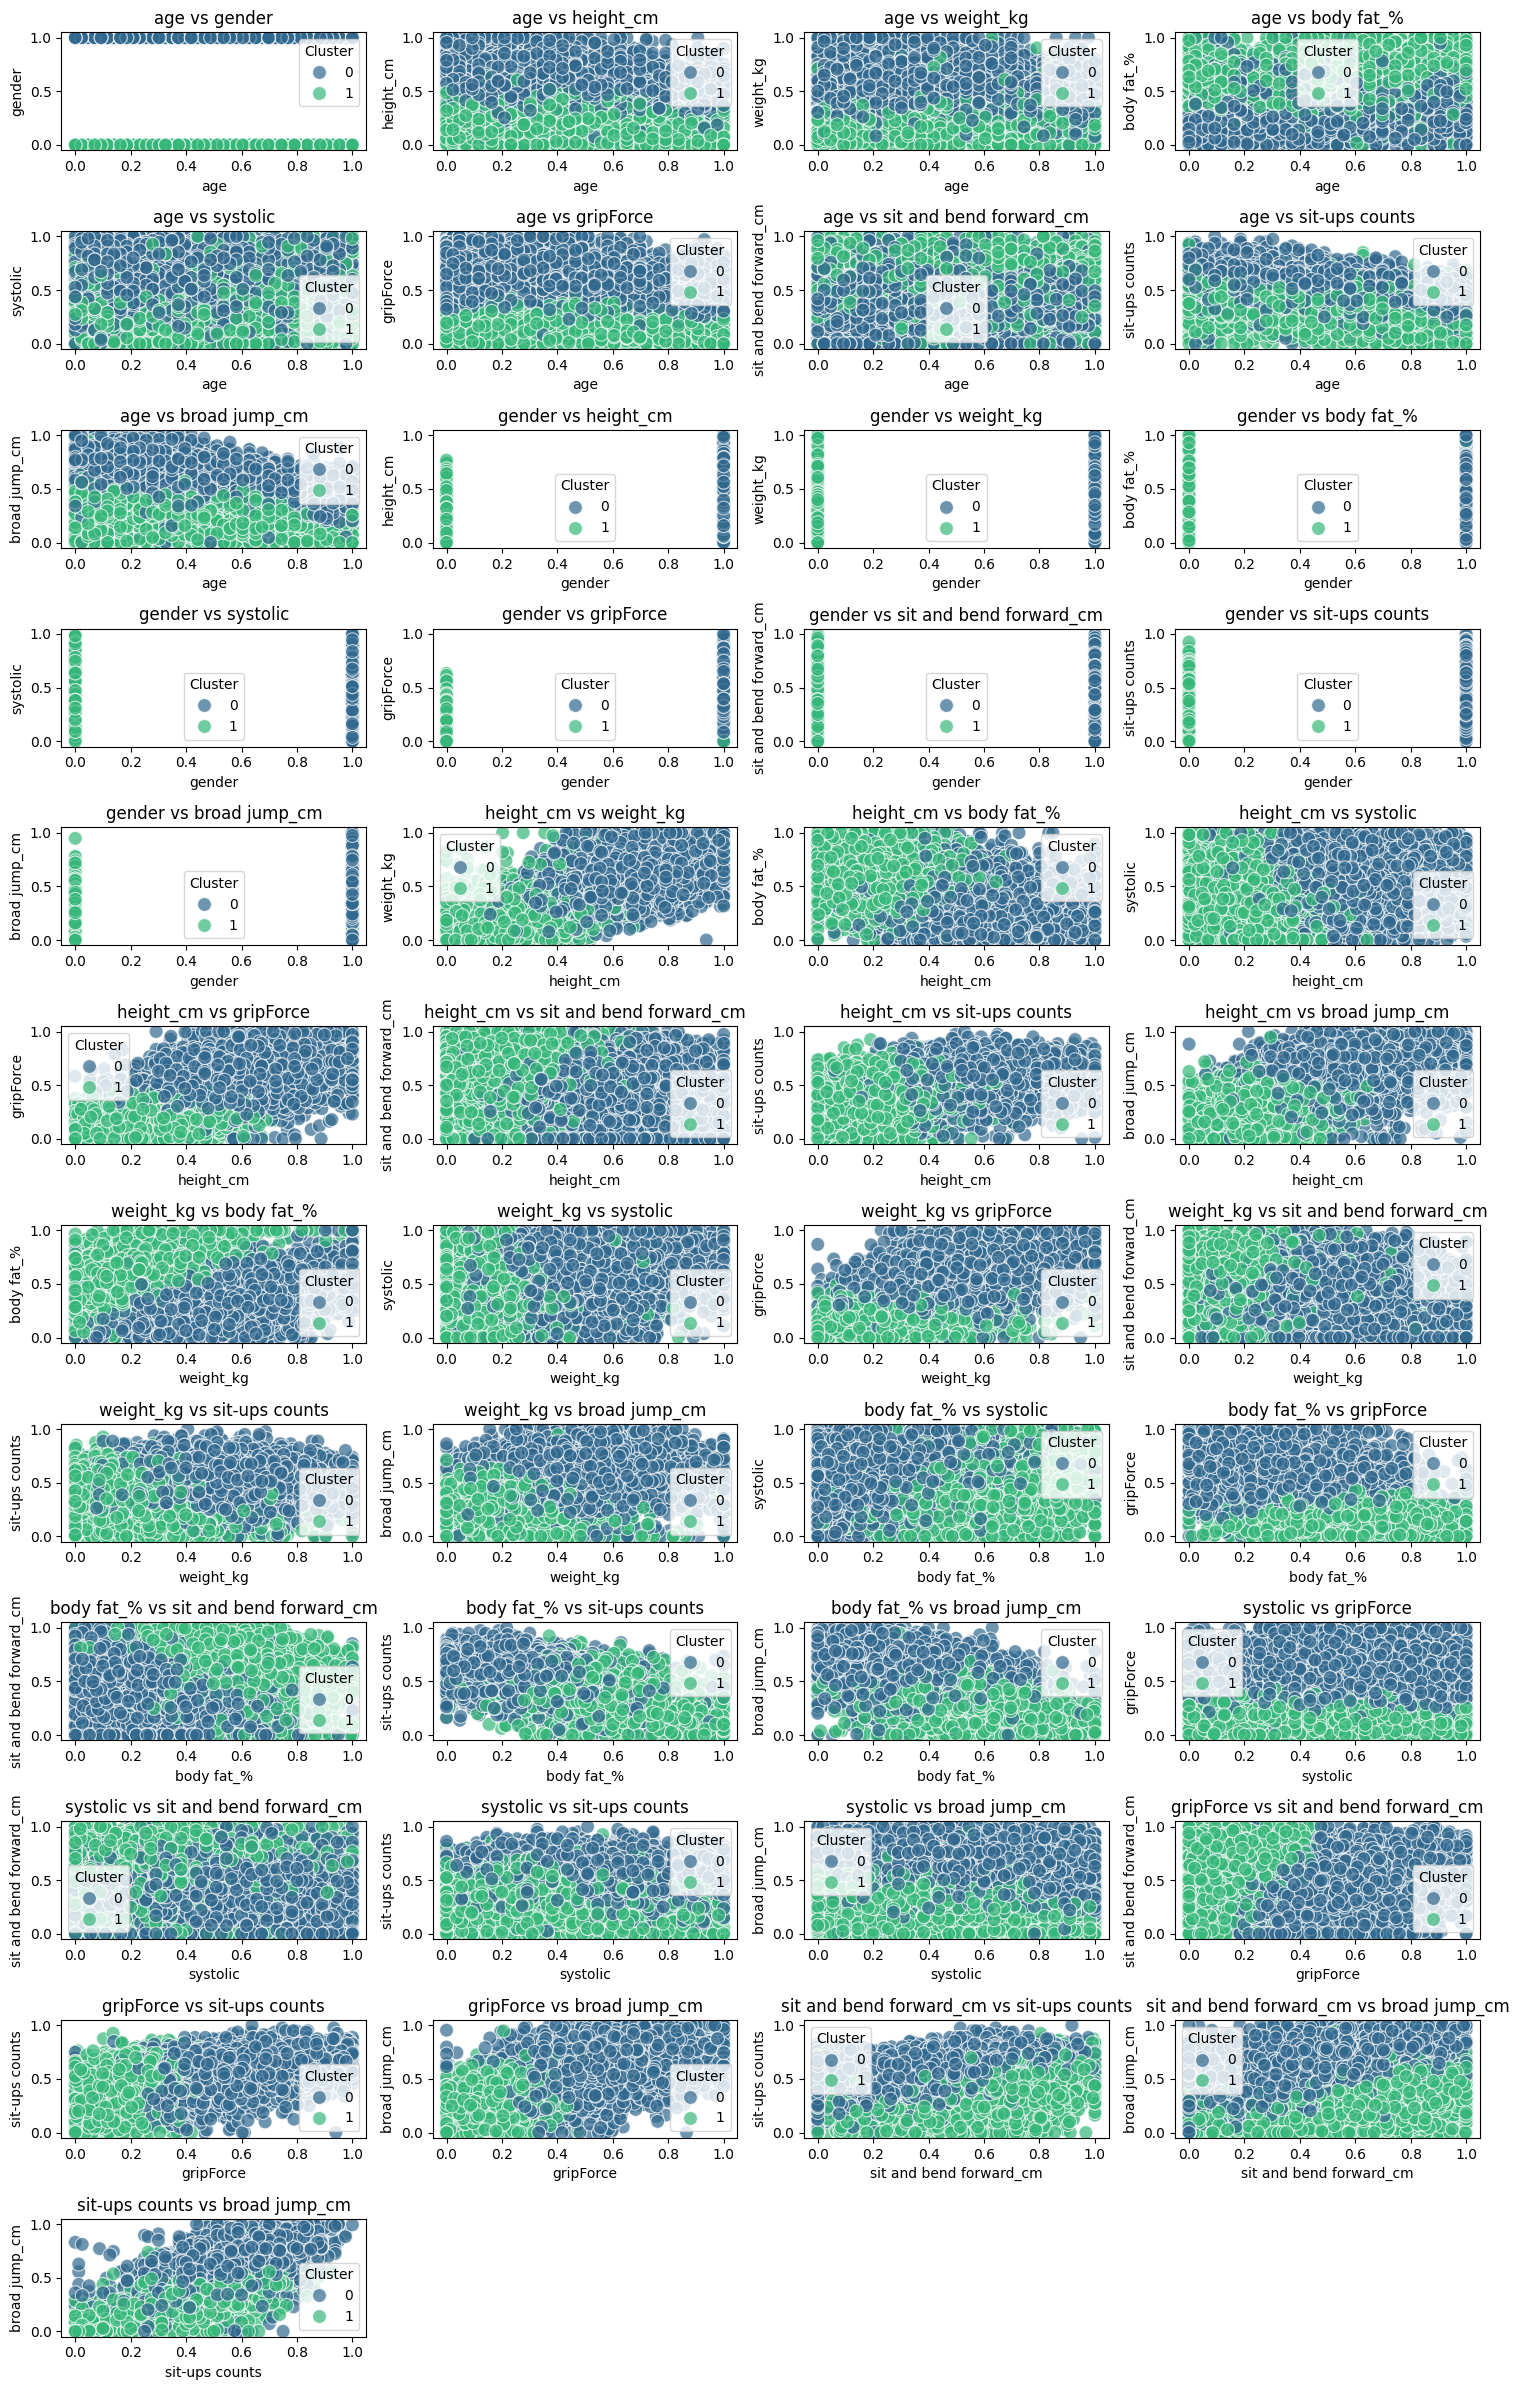

In [313]:
features = ['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'systolic',
            'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
            'broad jump_cm']

pairings = list(combinations(features, 2))
n_plots = len(pairings)
n_cols = 4
n_rows = (n_plots // n_cols) + (n_plots % n_cols > 0)

plt.figure(figsize=(15, n_rows * 2))
for i, (feature1, feature2) in enumerate(pairings):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data=cleaned_data, x=feature1, y=feature2, hue='Cluster', palette='viridis', s=100, alpha=0.7)
    plt.title(f'{feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.show()


Jumlah Data Dalam Cluster

In [314]:
cluster_counts = cleaned_data['Cluster'].value_counts()
print("Jumlah Data Dalam Cluster:")
print(cluster_counts)

Jumlah Data Dalam Cluster:
Cluster
0    8461
1    4931
Name: count, dtype: int64


Titik Centroid Cluster

In [315]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=cleaned_data.columns[:-1])
centroids['Cluster'] = range(len(centroids))
print("\nCluster centroids:")
centroids


Cluster centroids:


age    gender  height_cm  weight_kg  body fat_%  systolic  gripForce  \
0  0.352160  1.000000   0.596712   0.489127    0.286491  0.543273   0.581829   
1  0.392137  0.001217   0.224424   0.173854    0.547967  0.368972   0.149584   

   sit and bend forward_cm  sit-ups counts  broad jump_cm  Cluster  
0                 0.474003        0.562057       0.631493        0  
1                 0.638086        0.385723       0.260582        1

Jarak Antar Cluster

In [316]:
distances = cdist(kmeans.cluster_centers_, kmeans.cluster_centers_)
print("\nInter-cluster distances:")
print(pd.DataFrame(distances, columns=[f'Cluster {i}' for i in range(len(kmeans.cluster_centers_))],
                   index=[f'Cluster {i}' for i in range(len(kmeans.cluster_centers_))]))


Inter-cluster distances:
           Cluster 0  Cluster 1
Cluster 0   0.000000   1.310855
Cluster 1   1.310855   0.000000


### **6. Knowledge Discovery**

Ringkasan Statistik Fitur Terhadap Cluster

In [317]:
clusters = cleaned_data.iloc[:, -1]
original_data = scaler.inverse_transform(cleaned_data.iloc[:, :-1])
original_data = pd.DataFrame(original_data, columns=cleaned_data.columns[:-1])
original_data['Cluster'] = clusters

In [318]:
original_data.head()

age  gender  height_cm  weight_kg  body fat_%  systolic  gripForce  \
0  27.0     1.0      172.3      75.24        21.3     130.0       54.9   
1  25.0     1.0      165.0      55.80        15.7     126.0       36.4   
2  31.0     1.0      179.6      78.00        20.1     152.0       44.8   
3  32.0     1.0      174.5      71.10        18.4     147.0       41.4   
4  28.0     1.0      173.8      67.70        17.1     127.0       43.5   

   sit and bend forward_cm  sit-ups counts  broad jump_cm  Cluster  
0                     18.4            60.0          217.0        0  
1                     16.3            53.0          229.0        0  
2                     12.0            49.0          181.0        0  
3                     15.2            53.0          219.0        0  
4                     27.1            45.0          217.0        0

In [319]:
for cluster in sorted(original_data['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = original_data[original_data['Cluster'] == cluster]
    print(cluster_data.describe())


Cluster 0:
               age  gender   height_cm    weight_kg   body fat_%     systolic  \
count  8461.000000  8461.0  8461.00000  8461.000000  8461.000000  8461.000000   
mean     36.142891     1.0   173.24951    73.524829    20.267181   133.880038   
std      13.102236     0.0     5.73593     9.181167     5.712355    13.212499   
min      21.000000     1.0   153.20000    48.100000    11.300000   104.000000   
25%      25.000000     1.0   169.30000    67.300000    15.900000   123.000000   
50%      32.000000     1.0   173.10000    72.800000    20.000000   134.000000   
75%      45.000000     1.0   177.10000    79.000000    24.000000   144.000000   
max      64.000000     1.0   186.80000   100.080000    42.600000   159.000000   

         gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
count  8461.000000              8461.000000     8461.000000    8461.000000   
mean     43.447698                13.321305       44.964543     211.618497   
std       6.995714      

Distribusi Fitur Terhadap Cluster

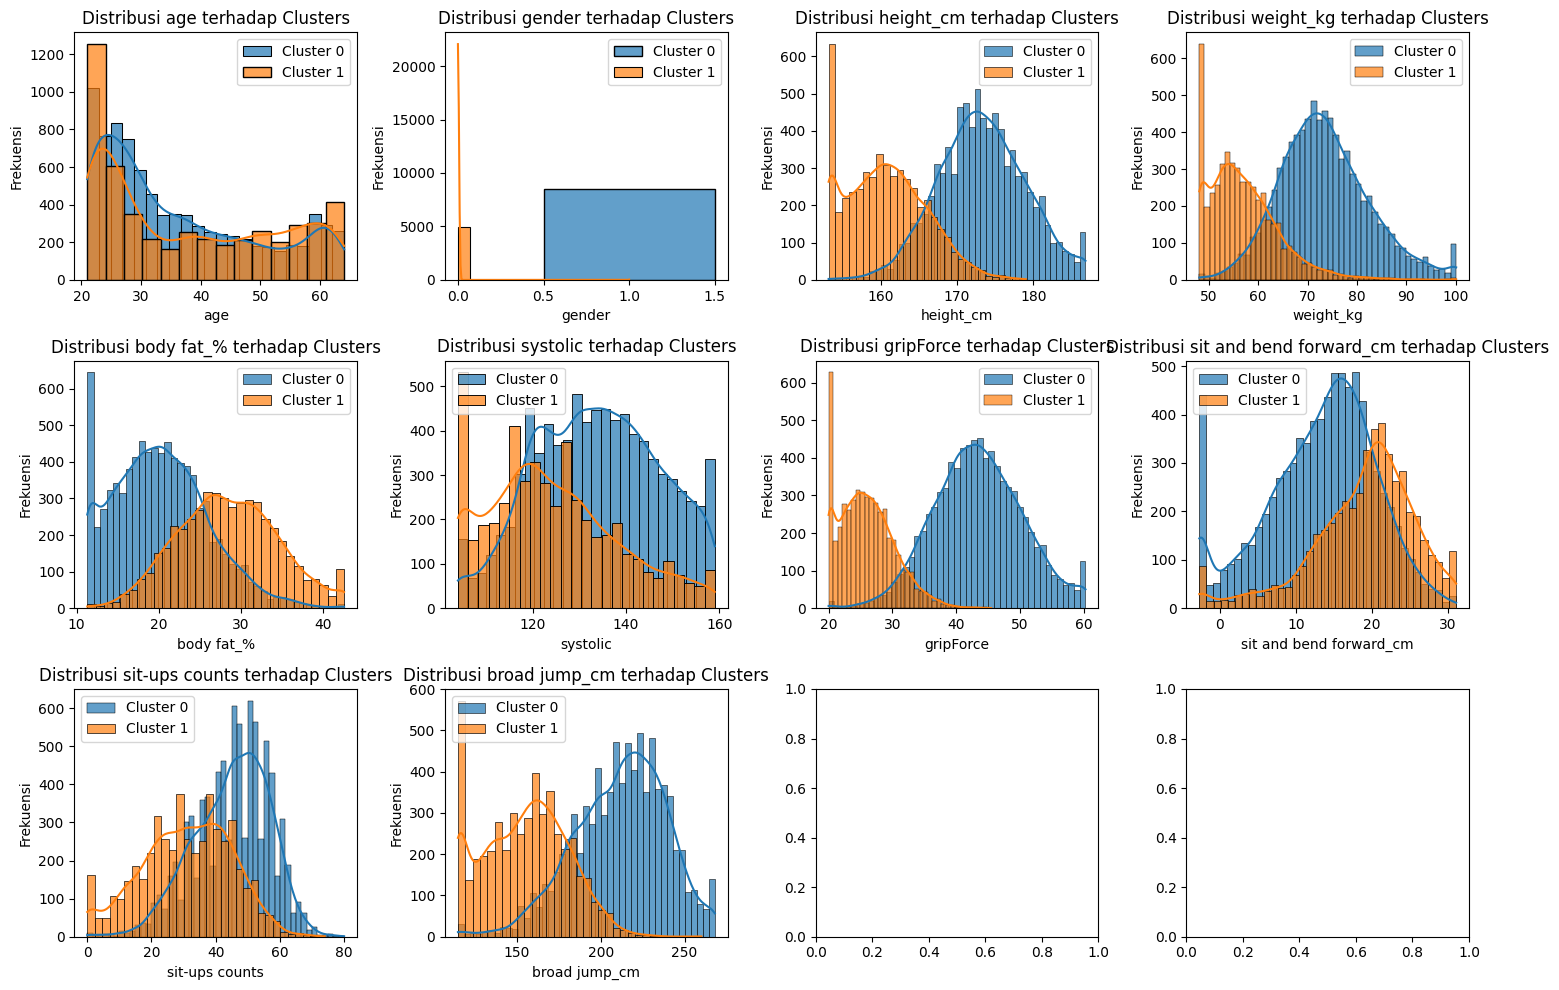

In [320]:
features = original_data.columns[:-1]
n_rows = 3
n_cols = 4
total_plots = len(features)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    for cluster in sorted(original_data['Cluster'].unique()):
        cluster_data = original_data[original_data['Cluster'] == cluster]
        sns.histplot(cluster_data[feature], kde=True, label=f'Cluster {cluster}', alpha=0.7, ax=ax)

    ax.set_title(f'Distribusi {feature} terhadap Clusters')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frekuensi')
    ax.legend()

plt.tight_layout()
plt.show()

**Karakteristik Cluster 0**

1.**Age (Usia)**:
Dalam cluster ini, faktor usia memiliki distribusi rentang data 21-64 tahun dengan rata-rata 36 tahun yang menunjukkan usia tersebar secara merata diseluruh ini namun mayoritas berusia muda.

2.**Gender (Jenis Kelamin)**:
Dalam cluster ini faktor jenis hanya terdiri dari satu jenis kelamin yang bernilai 1 atau laki-laki.

3.**Height (Tinggi Badan)**:
Dalam cluster ini, faktor tinggi badan memiliki distribusi rentang data 153cm-186cm dengan rata-rata 173cm yang menunjukkan tinggi badan tersebar secara merata diseluruh rentang ini namun mayoritas tinggi badan lebih tinggi.

4.**Weight (Berat Badan)**:
Dalam cluster ini, faktor tinggi badan memiliki distribusi rentang data 48kg-100kg dengan rata-rata 73kg yang menunjukkan berat badan tersebar secara merata diseluruh rentang ini namun mayoritas berat badan normal.

5.**Body Fat % (Persentase Lemak Tubuh)**:
Dalam cluster ini faktor persentase lemak tubuh memiliki distribusi rentang data 11%-42% dengan rata-rata 20% yang menunjukkan persentase lemak tubuh tersebar secara merata diseluruh rentang ini namun mayoritas normal untuk laki-laki.

6.**Systolic (Tekanan Darah Sistolik)**:
Dalam cluster ini, faktor tekanan dara sistolik memiliki distribusi rentang data 104mmHg-159mmHg dengan rata-rata 133mmHg yang menunjukkan tekanan darah sistolik tersebar secara merata diseluruh rentang ini namun mayoritas memiliki tekanan darah sistolik cukup tinggi.

7.**Grip Force (Kekuatan Genggaman)**:
Dalam cluster ini, faktor kekuatan genggaman memiliki distribusi rentang data 20kg-60kg dengan rata-rata 43kg yang menunjukkan kekuatan genggaman tersebar secara merata diseluruh rentang ini namun mayoritas memiliki kekuatan genggaman yang tinggi.

8.**Sit and Bend Forward (Kelenturan Tubuh)**:
Dalam cluster ini, faktor kelenturan tubuh memiliki distribusi rentang data -2cm-31cm dengan rata-rata 13cm yang menunjukkan kelenturan tubuh tersebar secara merata diseluruh rentang ini namun mayoritas memiliki kelenturan tubuh rendah.

9.**Sit-Ups Count (Jumlah Sit-Up)**:
Dalam cluster ini, faktor jumlah sit-up memiliki distribusi rentang data 0-80 kali dengan rata-rata 44 kali yang menunjukkan jumlah sit-up tersebar secara merata diseluruh rentang ini namun mayoritas memiliki jumlah sit-up cukup banyak.

10.**Broad Jump (Lompatan Jauh)**:
Dalam cluster ini, faktor lompatan jauh memiliki distribusi rentang data 115cm-268cm dengan rata-rata 211cm yang menunjukkan lompatan jauh tersebar secara merata diseluruh rentang ini namun mayoritas memiliki lompatan jauh yang cukup jauh.

**Karakteristik Cluster 1**

1.**Age (Usia)**:
Dalam cluster ini, faktor usia memiliki distribusi rentang data 14-64 tahun dengan rata-rata 37 tahun yang menunjukkan usia tersebar secara merata diseluruh ini namun mayoritas berusia muda.

2.**Gender (Jenis Kelamin)**:
Dalam cluster ini faktor jenis hanya terdiri dari 0 dan 1 atau perempuan dan laki-laki.

3.**Height (Tinggi Badan)**:
Dalam cluster ini, faktor tinggi badan memiliki distribusi rentang data 153cm-179cm dengan rata-rata 160cm yang menunjukkan tinggi badan tersebar secara tidak merata rentang ini namun mayoritas tinggi badan lebih pendek.

4.**Weight (Berat Badan)**:
Dalam cluster ini, faktor tinggi badan memiliki distribusi rentang data 48kg-100kg dengan rata-rata 57kg yang menunjukkan berat badan tersebar secara merata diseluruh rentang ini namun mayoritas berat badan lebih kecil.

5.**Body Fat % (Persentase Lemak Tubuh)**:
Dalam cluster ini faktor persentase lemak tubuh memiliki distribusi rentang data 11%-42% dengan rata-rata 28% yang menunjukkan persentase lemak tubuh tersebar secara merata diseluruh rentang ini cukup tinggi.

6.**Systolic (Tekanan Darah Sistolik)**:
Dalam cluster ini, faktor tekanan dara sistolik memiliki distribusi rentang data 104mmHg-159mmHg dengan rata-rata 124mmHg yang menunjukkan tekanan darah sistolik tersebar secara merata diseluruh rentang ini namun mayoritas memiliki tekanan darah normal.

7.**Grip Force (Kekuatan Genggaman)**:
Dalam cluster ini, faktor kekuatan genggaman memiliki distribusi rentang data 20kg-45kg dengan rata-rata 26kg yang menunjukkan kekuatan genggaman tersebar secara tidak merata diseluruh rentang ini namun mayoritas memiliki kekuatan genggaman yang rendah.

8.**Sit and Bend Forward (Kelenturan Tubuh)**:
Dalam cluster ini, faktor kelenturan tubuh memiliki distribusi rentang data -2cm-31cm dengan rata-rata 18cm yang menunjukkan kelenturan tubuh tersebar secara merata diseluruh rentang ini namun mayoritas memiliki kelenturan tubuh tinggi.

9.**Sit-Ups Count (Jumlah Sit-Up)**:
Dalam cluster ini, faktor jumlah sit-up memiliki distribusi rentang data 0-74 kali dengan rata-rata 30 kali yang menunjukkan jumlah sit-up tersebar secara tidak merata diseluruh rentang ini namun mayoritas memiliki jumlah sit-up lebih sedikit.

10.**Broad Jump (Lompatan Jauh)**:
Dalam cluster ini, faktor lompatan jauh memiliki distribusi rentang data 115cm-260cm dengan rata-rata 154cm yang menunjukkan lompatan jauh tersebar secara tidak merata diseluruh rentang ini namun mayoritas memiliki lompatan jauh yang pendek.

**Kesimpulan**

- Cluster 0 merupakan individu yang memiliki performa tubuh tinggi karena memiliki kekuatan (grip force), daya tahan (sit-ups), dan ledakan (broad jump) yang tinggi.
- Cluster 1 merupakan individu yang memiliki performa tubuh rendah karena memiliki kekuatan (grip force), daya tahan (sit-ups), dan ledakan (broad jump) yang rendah.
- Usia tidak secara signifikan menentukan tingkat performa tubuh karena pada kedua cluster memiliki rentang usia dan rata-rata usia yang sama.
- Jenis kelamin secara signifikan menentukan tingkat performa tubuh karena pada cluster 0 didominasi oleh laki-laki dibandingkan dengan cluster 1.
- Tinggi badan cukup signifikan menentukan tingkat performa tubuh karena pada cluster 0 memiliki rata-rata tinggi badan yang lebih tinggi dibandingkan dengan cluster 0.
- Berat badan secara signifikan menentukan tingkat performa tubuh karena pada cluster 0 memiliki rata-rata berat badan yang lebih besar dibandingkan dengan cluster 0.
- Tekanan darah sistolik tidak secara signifikan menentukan tingkat performa tubuh karena pada cluster 0 memiliki rata-rata tekanan darah sistolik lebih rendah dibandingan dengan cluster 1.
- Kelenturan tubuh tidak secara signifikan menentukan tingkat performa tubuh karena pada cluster 0 memiliki rata-rata kelenturan tubuh yang lebih rendah dibandingkan dengan cluster 1.

### **7. Eksport Model**

In [321]:
with open('Model_KMeans_Body_Performance.pkl', 'wb') as f:
    pickle.dump({
        'encoder': encoders,
        'scaler': scaler,
        'kmeans': kmeans
    }, f)
print("Model dan preprocessing telah disimpan.")

Model dan preprocessing telah disimpan.


In [323]:
with open('Model_KMeans_Body_Performance.pkl', 'rb') as f:
    pipeline = pickle.load(f)

encoder = pipeline['encoder']
scaler = pipeline['scaler']
kmeans = pipeline['kmeans']

data_baru = pd.DataFrame([{
    'age': 27,
    'gender': 'M',
    'height_cm': 172.3,
    'weight_kg': 75.24,
    'body fat_%': 21.3,
    'systolic': 130,
    'gripForce': 54.9,
    'sit and bend forward_cm': 18.4,
    'sit-ups counts': 60,
    'broad jump_cm': 217
}])

for column in ['gender']:
    data_baru[column] = encoder[column].transform(data_baru[column])

data_baru_scaled = scaler.transform(data_baru)
cluster_pred = kmeans.predict(data_baru_scaled)

jarak_ke_cluster = kmeans.transform(data_baru_scaled)

print(f"Jarak ke cluster 0 (Performa Tinggi): {jarak_ke_cluster[0][0]:.4f}")
print(f"Jarak ke cluster 1 (Performa Rendah): {jarak_ke_cluster[0][1]:.4f}")

if cluster_pred[0] == 0:
    print("Data baru termasuk ke dalam cluster 0: Performa tubuh TINGGI.")
else:
    print("Data baru termasuk ke dalam cluster 1: Performa tubuh RENDAH.")

Jarak ke cluster 0 (Performa Tinggi): 0.4394
Jarak ke cluster 1 (Performa Rendah): 1.4748
Data baru termasuk ke dalam cluster 0: Performa tubuh TINGGI.
